<a href="https://colab.research.google.com/github/SamMilnes/Weather-Prediction-Models-By-Country/blob/main/Analysis_By_Country.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
all_countries = pd.read_csv('/content/gdrive/MyDrive/Data Science Group Project/GlobalLandTemperaturesByCountry.csv')
len(all_countries)
# all_countries["Country"].unique()

577462

In [3]:
united_states = all_countries[all_countries["Country"] == "United States"]
afghanistan = all_countries[all_countries["Country"] == "Afghanistan"]
bangladesh = all_countries[all_countries["Country"] == "Bangladesh"]
chad = all_countries[all_countries["Country"] == "Chad"]
haiti = all_countries[all_countries["Country"] == "Haiti"]

In [4]:
lst = [united_states, afghanistan, bangladesh, chad, haiti]
lst_string = ["United States", "Afghanistan", "Bangladesh", "Chad", "Haiti"]
for i in range(0, len(lst)):
  print(lst_string[i], "dataframe has", len(lst[i]), "rows")

United States dataframe has 2941 rows
Afghanistan dataframe has 2106 rows
Bangladesh dataframe has 2613 rows
Chad dataframe has 1893 rows
Haiti dataframe has 2277 rows


# LSTM Time Series Models For Each Country

In [5]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from keras.callbacks import History
from tensorflow.keras.models import load_model

In [6]:
# This function is used to make our LSTM Models for each country
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+5]]
    X.append(row)
    label = df_as_np[i+5]
    y.append(label)
  return np.array(X), np.array(y)

In [7]:
# This function will be used to clean the dataframes, ie drop na values and get only the date and temperture columns
def clean_df(df):
  temp = df.copy()
  temp = temp[["dt", "AverageTemperature"]]
  temp = temp.dropna()
  temp["Date"] = pd.to_datetime(temp.dt, format='%Y-%m-%d')
  temp = temp[["Date", "AverageTemperature"]]

  just_temp_df = temp["AverageTemperature"]

  return temp, just_temp_df

In [8]:
# This function will be used to get the lengths for train, val and test data
import math
def get_lengths(df):
  # print(len(df))
  train = int(len(df) * .90)
  val = int(len(df) * .04)
  test = int(len(df) * .06)

  # print(train + val + test)

  return train, val, test

# United States

In [9]:
united_states_final, united_states_temp_only = clean_df(united_states)
# united_states_final.head()
WINDOW_SIZE = 5
X, y = df_to_X_y(united_states_temp_only, WINDOW_SIZE)
X.shape, y.shape

((2477, 5, 1), (2477,))

In [10]:
train_len, val_len, test_len = get_lengths(united_states_temp_only)
# print(train_len, val_len, test_len)
X_train, y_train = X[:train_len], y[:train_len]
X_val, y_val = X[train_len:(val_len+train_len)], y[train_len:(val_len+train_len)]
X_test, y_test = X[(val_len+train_len):], y[(val_len+train_len):]
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2233, 5, 1), (2233,), (99, 5, 1), (99,), (145, 5, 1), (145,))

In [11]:
model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 8)                 520       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [12]:
cp = ModelCheckpoint('us_model/', save_best_only=True)
history = History()
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [13]:
model1.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp, history])

Epoch 1/10
67/70 [===========================>..] - ETA: 0s - loss: 98.1881 - root_mean_squared_error: 9.9090  

70/70 [==============================] - 16s 155ms/step - loss: 95.6929 - root_mean_squared_error: 9.7823 - val_loss: 41.3743 - val_root_mean_squared_error: 6.4323
Epoch 2/10
64/70 [==========================>...] - ETA: 0s - loss: 13.5710 - root_mean_squared_error: 3.6839

70/70 [==============================] - 5s 69ms/step - loss: 12.9661 - root_mean_squared_error: 3.6008 - val_loss: 4.9169 - val_root_mean_squared_error: 2.2174
Epoch 3/10
63/70 [==========================>...] - ETA: 0s - loss: 3.4873 - root_mean_squared_error: 1.8674

70/70 [==============================] - 5s 76ms/step - loss: 3.3620 - root_mean_squared_error: 1.8336 - val_loss: 1.7033 - val_root_mean_squared_error: 1.3051
Epoch 4/10
67/70 [===========================>..] - ETA: 0s - loss: 2.2079 - root_mean_squared_error: 1.4859

70/70 [==============================] - 5s 68ms/step - loss: 2.2285 - root_mean_squared_error: 1.4928 - val_loss: 1.5823 - val_root_mean_squared_error: 1.2579
Epoch 5/10
70/70 [==============================] - 0s 5ms/step - loss: 2.0572 - root_mean_squared_error: 1.4343 - val_loss: 1.6156 - val_root_mean_squared_error: 1.2711
Epoch 6/10
66/70 [===========================>..] - ETA: 0s - loss: 2.0345 - root_mean_squared_error: 1.4263

70/70 [==============================] - 5s 76ms/step - loss: 2.0237 - root_mean_squared_error: 1.4226 - val_loss: 1.5486 - val_root_mean_squared_error: 1.2444
Epoch 7/10
70/70 [==============================] - 0s 6ms/step - loss: 1.9405 - root_mean_squared_error: 1.3930 - val_loss: 1.6116 - val_root_mean_squared_error: 1.2695
Epoch 8/10
67/70 [===========================>..] - ETA: 0s - loss: 1.9003 - root_mean_squared_error: 1.3785

70/70 [==============================] - 5s 68ms/step - loss: 1.8914 - root_mean_squared_error: 1.3753 - val_loss: 1.4403 - val_root_mean_squared_error: 1.2001
Epoch 9/10
68/70 [============================>.] - ETA: 0s - loss: 1.8872 - root_mean_squared_error: 1.3737

70/70 [==============================] - 5s 76ms/step - loss: 1.8780 - root_mean_squared_error: 1.3704 - val_loss: 1.2150 - val_root_mean_squared_error: 1.1023
Epoch 10/10
62/70 [=========================>....] - ETA: 0s - loss: 1.7003 - root_mean_squared_error: 1.3039

70/70 [==============================] - 5s 69ms/step - loss: 1.8443 - root_mean_squared_error: 1.3580 - val_loss: 1.1722 - val_root_mean_squared_error: 1.0827


Text(0.5, 1.0, 'Val Loss')

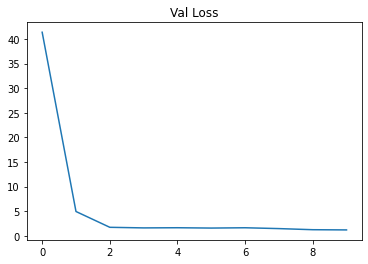

In [14]:
plt.plot(model1.history.history['val_loss'])
plt.title('Val Loss')

In [15]:
model1 = load_model('us_model/')
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals':y_train})
# train_results

70/70 [==============================] - 1s 2ms/step


In [16]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions': test_predictions, 'Actuals':y_test})
test_results["Difference"] = abs(test_results["Actuals"] - test_results["Test Predictions"])
# test_results
united_states_average_accuracy = test_results["Difference"].mean()
print("On Average, the mean difference between our predictions and actuals for our", len(test_results), "test data points is:", united_states_average_accuracy)

5/5 [==============================] - 0s 4ms/step
On Average, the mean difference between our predictions and actuals for our 145 test data points is: 0.8783189021932668


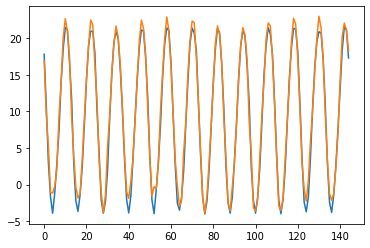

In [17]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

# Afghanistan

In [18]:
afghanistan_final, afghanistan_final_temp_only = clean_df(afghanistan)
# united_states_final.head()
WINDOW_SIZE = 5
afghanistan_X, afghanistan_y = df_to_X_y(afghanistan_final_temp_only, WINDOW_SIZE)
afghanistan_X.shape, afghanistan_y.shape

((2080, 5, 1), (2080,))

In [19]:
afghanistan_train_len, afghanistan_val_len, afghanistan_test_len = get_lengths(afghanistan_final_temp_only)
print(afghanistan_train_len, afghanistan_val_len, afghanistan_test_len)
afghanistan_X_train, afghanistan_y_train = afghanistan_X[:afghanistan_train_len], afghanistan_y[:afghanistan_train_len]
afghanistan_X_val, afghanistan_y_val = afghanistan_X[afghanistan_train_len:(afghanistan_val_len+afghanistan_train_len)], afghanistan_y[afghanistan_train_len:(afghanistan_val_len+afghanistan_train_len)]
afghanistan_X_test, afghanistan_y_test = afghanistan_X[(afghanistan_val_len+afghanistan_train_len):], afghanistan_y[(afghanistan_val_len+afghanistan_train_len):]
afghanistan_X_train.shape, afghanistan_y_train.shape, afghanistan_X_val.shape, afghanistan_y_val.shape, afghanistan_X_test.shape, afghanistan_y_test.shape

1876 83 125


((1876, 5, 1), (1876,), (83, 5, 1), (83,), (121, 5, 1), (121,))

In [20]:
afghan_model = Sequential()
afghan_model.add(InputLayer((5,1)))
afghan_model.add(LSTM(64))
afghan_model.add(Dense(8, 'relu'))
afghan_model.add(Dense(1, 'linear'))

afghan_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 8)                 520       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [21]:
afghan_cp = ModelCheckpoint('afghan_model/', save_best_only=True)
afghan_history = History()
afghan_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [22]:
afghan_model.fit(afghanistan_X_train, afghanistan_y_train, validation_data=(afghanistan_X_val, afghanistan_y_val), epochs=10, callbacks=[afghan_cp, afghan_history])

Epoch 1/10
54/59 [==========================>...] - ETA: 0s - loss: 181.9640 - root_mean_squared_error: 13.4894

59/59 [==============================] - 8s 95ms/step - loss: 175.8123 - root_mean_squared_error: 13.2594 - val_loss: 106.9267 - val_root_mean_squared_error: 10.3405
Epoch 2/10
50/59 [========================>.....] - ETA: 0s - loss: 75.9825 - root_mean_squared_error: 8.7168

59/59 [==============================] - 5s 81ms/step - loss: 71.7622 - root_mean_squared_error: 8.4713 - val_loss: 49.8887 - val_root_mean_squared_error: 7.0632
Epoch 3/10
55/59 [==========================>...] - ETA: 0s - loss: 32.8661 - root_mean_squared_error: 5.7329

59/59 [==============================] - 5s 89ms/step - loss: 31.8705 - root_mean_squared_error: 5.6454 - val_loss: 18.9648 - val_root_mean_squared_error: 4.3549
Epoch 4/10
55/59 [==========================>...] - ETA: 0s - loss: 9.5751 - root_mean_squared_error: 3.0944 

59/59 [==============================] - 5s 82ms/step - loss: 9.2511 - root_mean_squared_error: 3.0416 - val_loss: 5.0250 - val_root_mean_squared_error: 2.2416
Epoch 5/10
58/59 [============================>.] - ETA: 0s - loss: 3.3421 - root_mean_squared_error: 1.8281

59/59 [==============================] - 5s 82ms/step - loss: 3.3363 - root_mean_squared_error: 1.8265 - val_loss: 2.6649 - val_root_mean_squared_error: 1.6325
Epoch 6/10
59/59 [==============================] - 0s 6ms/step - loss: 2.4044 - root_mean_squared_error: 1.5506 - val_loss: 3.2624 - val_root_mean_squared_error: 1.8062
Epoch 7/10
53/59 [=========================>....] - ETA: 0s - loss: 2.1604 - root_mean_squared_error: 1.4698

59/59 [==============================] - 5s 91ms/step - loss: 2.1876 - root_mean_squared_error: 1.4790 - val_loss: 2.3407 - val_root_mean_squared_error: 1.5299
Epoch 8/10
59/59 [==============================] - 0s 6ms/step - loss: 2.0890 - root_mean_squared_error: 1.4453 - val_loss: 2.4886 - val_root_mean_squared_error: 1.5775
Epoch 9/10
59/59 [==============================] - 0s 6ms/step - loss: 2.0723 - root_mean_squared_error: 1.4395 - val_loss: 2.3791 - val_root_mean_squared_error: 1.5424
Epoch 10/10
59/59 [==============================] - 0s 5ms/step - loss: 1.9980 - root_mean_squared_error: 1.4135 - val_loss: 3.2067 - val_root_mean_squared_error: 1.7907


Text(0.5, 1.0, 'Val Loss')

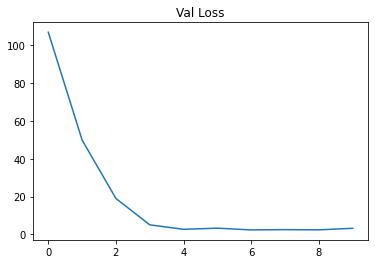

In [23]:
plt.plot(afghan_model.history.history['val_loss'])
plt.title('Val Loss')

In [24]:
afghan_model = load_model('afghan_model/')
afghan_train_predictions = afghan_model.predict(afghanistan_X_train).flatten()
afghan_train_results = pd.DataFrame(data={'Train Predictions': afghan_train_predictions, 'Actuals':afghanistan_y_train})
# afghan_train_results

59/59 [==============================] - 1s 2ms/step


In [25]:
afghan_test_predictions = afghan_model.predict(afghanistan_X_test).flatten()
afghan_test_results = pd.DataFrame(data={'Test Predictions': afghan_test_predictions, 'Actuals':afghanistan_y_test})
afghan_test_results["Difference"] = abs(afghan_test_results["Actuals"] - afghan_test_results["Test Predictions"])
afghan_average_accuracy = afghan_test_results["Difference"].mean()
print("On Average, the mean difference between our predictions and actuals for our", len(afghan_test_results), "test data points is:", afghan_average_accuracy)

4/4 [==============================] - 0s 4ms/step
On Average, the mean difference between our predictions and actuals for our 121 test data points is: 1.5451796312726236


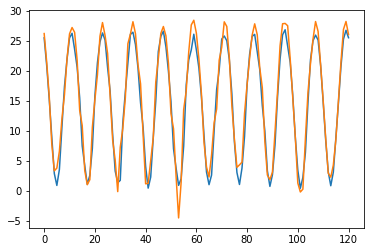

In [26]:
plt.plot(afghan_test_results['Test Predictions'])
plt.plot(afghan_test_results['Actuals'])

# Bangladesh

In [27]:
bangladesh_final, bangladesh_final_temp_only = clean_df(bangladesh)
# bangladesh_final.head()
WINDOW_SIZE = 5
bangladesh_X, bangladesh_y = df_to_X_y(bangladesh_final_temp_only, WINDOW_SIZE)
bangladesh_X.shape, bangladesh_y.shape

((2524, 5, 1), (2524,))

In [28]:
bangladesh_train_len, bangladesh_val_len, bangladesh_test_len = get_lengths(bangladesh_final_temp_only)
print(bangladesh_train_len, bangladesh_val_len, bangladesh_test_len)
bangladesh_X_train, bangladesh_y_train = bangladesh_X[:bangladesh_train_len], bangladesh_y[:bangladesh_train_len]
bangladesh_X_val, bangladesh_y_val = bangladesh_X[bangladesh_train_len:(bangladesh_val_len+bangladesh_train_len)], bangladesh_y[bangladesh_train_len:(bangladesh_val_len+bangladesh_train_len)]
bangladesh_X_test, bangladesh_y_test = bangladesh_X[(bangladesh_val_len+bangladesh_train_len):], bangladesh_y[(bangladesh_val_len+bangladesh_train_len):]
bangladesh_X_train.shape, bangladesh_y_train.shape, bangladesh_X_val.shape, bangladesh_y_val.shape, bangladesh_X_test.shape, bangladesh_y_test.shape

2276 101 151


((2276, 5, 1), (2276,), (101, 5, 1), (101,), (147, 5, 1), (147,))

In [29]:
bangladesh_model = Sequential()
bangladesh_model.add(InputLayer((5,1)))
bangladesh_model.add(LSTM(64))
bangladesh_model.add(Dense(8, 'relu'))
bangladesh_model.add(Dense(1, 'linear'))

bangladesh_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [30]:
bangladesh_cp = ModelCheckpoint('bangladesh_model/', save_best_only=True)
bangladesh_history = History()
bangladesh_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [31]:
bangladesh_model.fit(bangladesh_X_train, bangladesh_y_train, validation_data=(bangladesh_X_val, bangladesh_y_val), epochs=10, callbacks=[bangladesh_cp, bangladesh_history])

Epoch 1/10
66/72 [==========================>...] - ETA: 0s - loss: 492.3039 - root_mean_squared_error: 22.1879

72/72 [==============================] - 8s 75ms/step - loss: 474.2944 - root_mean_squared_error: 21.7783 - val_loss: 244.8406 - val_root_mean_squared_error: 15.6474
Epoch 2/10
67/72 [==========================>...] - ETA: 0s - loss: 83.4860 - root_mean_squared_error: 9.1371

72/72 [==============================] - 5s 67ms/step - loss: 79.5431 - root_mean_squared_error: 8.9187 - val_loss: 15.7501 - val_root_mean_squared_error: 3.9686
Epoch 3/10
66/72 [==========================>...] - ETA: 0s - loss: 14.6010 - root_mean_squared_error: 3.8211

72/72 [==============================] - 5s 73ms/step - loss: 14.6960 - root_mean_squared_error: 3.8335 - val_loss: 14.1084 - val_root_mean_squared_error: 3.7561
Epoch 4/10
72/72 [==============================] - 0s 5ms/step - loss: 14.5578 - root_mean_squared_error: 3.8155 - val_loss: 14.1606 - val_root_mean_squared_error: 3.7631
Epoch 5/10
70/72 [============================>.] - ETA: 0s - loss: 13.0773 - root_mean_squared_error: 3.6163

72/72 [==============================] - 5s 66ms/step - loss: 13.0423 - root_mean_squared_error: 3.6114 - val_loss: 11.0438 - val_root_mean_squared_error: 3.3232
Epoch 6/10
66/72 [==========================>...] - ETA: 0s - loss: 9.6172 - root_mean_squared_error: 3.1012

72/72 [==============================] - 5s 75ms/step - loss: 9.4743 - root_mean_squared_error: 3.0780 - val_loss: 7.9661 - val_root_mean_squared_error: 2.8224
Epoch 7/10
63/72 [=========================>....] - ETA: 0s - loss: 7.1506 - root_mean_squared_error: 2.6741

72/72 [==============================] - 6s 79ms/step - loss: 7.1942 - root_mean_squared_error: 2.6822 - val_loss: 6.8075 - val_root_mean_squared_error: 2.6091
Epoch 8/10
70/72 [============================>.] - ETA: 0s - loss: 5.8028 - root_mean_squared_error: 2.4089

72/72 [==============================] - 5s 74ms/step - loss: 5.7733 - root_mean_squared_error: 2.4028 - val_loss: 4.9255 - val_root_mean_squared_error: 2.2194
Epoch 9/10
69/72 [===========================>..] - ETA: 0s - loss: 4.5136 - root_mean_squared_error: 2.1245

72/72 [==============================] - 5s 76ms/step - loss: 4.5027 - root_mean_squared_error: 2.1220 - val_loss: 4.0769 - val_root_mean_squared_error: 2.0191
Epoch 10/10
67/72 [==========================>...] - ETA: 0s - loss: 3.4823 - root_mean_squared_error: 1.8661

72/72 [==============================] - 5s 67ms/step - loss: 3.4431 - root_mean_squared_error: 1.8556 - val_loss: 2.6943 - val_root_mean_squared_error: 1.6414


Text(0.5, 1.0, 'Val Loss')

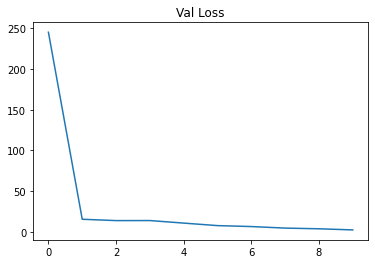

In [32]:
plt.plot(bangladesh_model.history.history['val_loss'])
plt.title('Val Loss')

In [33]:
bangladesh_model = load_model('bangladesh_model/')
bangladesh_train_predictions = bangladesh_model.predict(bangladesh_X_train).flatten()
bangladesh_train_results = pd.DataFrame(data={'Train Predictions': bangladesh_train_predictions, 'Actuals':bangladesh_y_train})
# afghan_train_results

72/72 [==============================] - 1s 2ms/step


In [34]:
bangladesh_test_predictions = bangladesh_model.predict(bangladesh_X_test).flatten()
bangladesh_test_results = pd.DataFrame(data={'Test Predictions': bangladesh_test_predictions, 'Actuals':bangladesh_y_test})
bangladesh_test_results["Difference"] = abs(bangladesh_test_results["Actuals"] - bangladesh_test_results["Test Predictions"])
bangladesh_average_accuracy = bangladesh_test_results["Difference"].mean()
print("On Average, the mean difference between our predictions and actuals for our", len(bangladesh_test_results), "test data points is:", bangladesh_average_accuracy)

5/5 [==============================] - 0s 3ms/step
On Average, the mean difference between our predictions and actuals for our 147 test data points is: 1.440023753678718


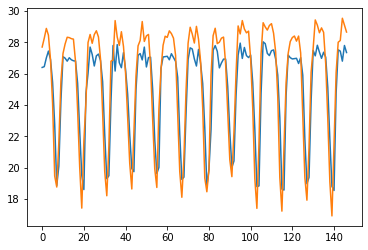

In [35]:
plt.plot(bangladesh_test_results['Test Predictions'])
plt.plot(bangladesh_test_results['Actuals'])

# Chad

In [36]:
chad_final, chad_final_temp_only = clean_df(chad)
# chad_final.head()
WINDOW_SIZE = 5
chad_X, chad_y = df_to_X_y(chad_final_temp_only, WINDOW_SIZE)
chad_X.shape, chad_y.shape

((1730, 5, 1), (1730,))

In [37]:
chad_train_len, chad_val_len, chad_test_len = get_lengths(chad_final_temp_only)
print(chad_train_len, chad_val_len, chad_test_len)
chad_X_train, chad_y_train = chad_X[:chad_train_len], chad_y[:chad_train_len]
chad_X_val, chad_y_val = chad_X[chad_train_len:(chad_val_len+chad_train_len)], chad_y[chad_train_len:(chad_val_len+chad_train_len)]
chad_X_test, chad_y_test = chad_X[(chad_val_len+chad_train_len):], chad_y[(chad_val_len+chad_train_len):]
chad_X_train.shape, chad_y_train.shape, chad_X_val.shape, chad_y_val.shape, chad_X_test.shape, chad_y_test.shape

1561 69 104


((1561, 5, 1), (1561,), (69, 5, 1), (69,), (100, 5, 1), (100,))

In [38]:
chad_model = Sequential()
chad_model.add(InputLayer((5,1)))
chad_model.add(LSTM(64))
chad_model.add(Dense(8, 'relu'))
chad_model.add(Dense(1, 'linear'))
chad_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 64)                16896     
                                                                 
 dense_6 (Dense)             (None, 8)                 520       
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [39]:
chad_cp = ModelCheckpoint('chad_model/', save_best_only=True)
chad_history = History()
chad_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [40]:
chad_model.fit(chad_X_train, chad_y_train, validation_data=(chad_X_val, chad_y_val), epochs=10, callbacks=[chad_cp, chad_history])

Epoch 1/10
44/49 [=========================>....] - ETA: 0s - loss: 585.3976 - root_mean_squared_error: 24.1950

49/49 [==============================] - 7s 109ms/step - loss: 562.1701 - root_mean_squared_error: 23.7101 - val_loss: 341.6172 - val_root_mean_squared_error: 18.4829
Epoch 2/10
45/49 [==========================>...] - ETA: 0s - loss: 159.1466 - root_mean_squared_error: 12.6153

49/49 [==============================] - 5s 106ms/step - loss: 150.5320 - root_mean_squared_error: 12.2691 - val_loss: 53.0457 - val_root_mean_squared_error: 7.2832
Epoch 3/10
45/49 [==========================>...] - ETA: 0s - loss: 19.4731 - root_mean_squared_error: 4.4128

49/49 [==============================] - 5s 96ms/step - loss: 18.8080 - root_mean_squared_error: 4.3368 - val_loss: 12.0435 - val_root_mean_squared_error: 3.4704
Epoch 4/10
45/49 [==========================>...] - ETA: 0s - loss: 10.3768 - root_mean_squared_error: 3.2213

49/49 [==============================] - 5s 96ms/step - loss: 10.4090 - root_mean_squared_error: 3.2263 - val_loss: 11.8214 - val_root_mean_squared_error: 3.4382
Epoch 5/10
46/49 [===========================>..] - ETA: 0s - loss: 10.0242 - root_mean_squared_error: 3.1661

49/49 [==============================] - 5s 112ms/step - loss: 10.0917 - root_mean_squared_error: 3.1767 - val_loss: 11.4388 - val_root_mean_squared_error: 3.3821
Epoch 6/10
46/49 [===========================>..] - ETA: 0s - loss: 9.7155 - root_mean_squared_error: 3.1170

49/49 [==============================] - 5s 96ms/step - loss: 9.7182 - root_mean_squared_error: 3.1174 - val_loss: 11.3716 - val_root_mean_squared_error: 3.3722
Epoch 7/10
41/49 [========================>.....] - ETA: 0s - loss: 9.4528 - root_mean_squared_error: 3.0745

49/49 [==============================] - 5s 95ms/step - loss: 9.4313 - root_mean_squared_error: 3.0710 - val_loss: 10.7155 - val_root_mean_squared_error: 3.2735
Epoch 8/10
44/49 [=========================>....] - ETA: 0s - loss: 8.7527 - root_mean_squared_error: 2.9585

49/49 [==============================] - 5s 110ms/step - loss: 8.6368 - root_mean_squared_error: 2.9388 - val_loss: 9.6932 - val_root_mean_squared_error: 3.1134
Epoch 9/10
44/49 [=========================>....] - ETA: 0s - loss: 7.1549 - root_mean_squared_error: 2.6749

49/49 [==============================] - 5s 96ms/step - loss: 7.0709 - root_mean_squared_error: 2.6591 - val_loss: 8.1452 - val_root_mean_squared_error: 2.8540
Epoch 10/10
43/49 [=========================>....] - ETA: 0s - loss: 6.0573 - root_mean_squared_error: 2.4612

49/49 [==============================] - 5s 96ms/step - loss: 6.0167 - root_mean_squared_error: 2.4529 - val_loss: 7.3623 - val_root_mean_squared_error: 2.7134


Text(0.5, 1.0, 'Val Loss')

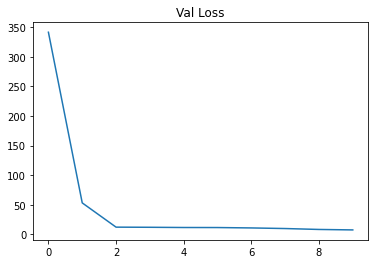

In [41]:
plt.plot(chad_model.history.history['val_loss'])
plt.title('Val Loss')

In [42]:
chad_model = load_model('chad_model/')
chad_train_predictions = chad_model.predict(chad_X_train).flatten()
chad_train_results = pd.DataFrame(data={'Train Predictions': chad_train_predictions, 'Actuals':chad_y_train})
# afghan_train_results

49/49 [==============================] - 1s 2ms/step


In [43]:
chad_test_predictions = chad_model.predict(chad_X_test).flatten()
chad_test_results = pd.DataFrame(data={'Test Predictions':chad_test_predictions, 'Actuals':chad_y_test})
chad_test_results["Difference"] = abs(chad_test_results["Actuals"] - chad_test_results["Test Predictions"])
chad_average_accuracy = chad_test_results["Difference"].mean()
print("On Average, the mean difference between our predictions and actuals for our", len(chad_test_results), "test data points is:", chad_average_accuracy)

4/4 [==============================] - 0s 3ms/step
On Average, the mean difference between our predictions and actuals for our 100 test data points is: 2.2553059570312506


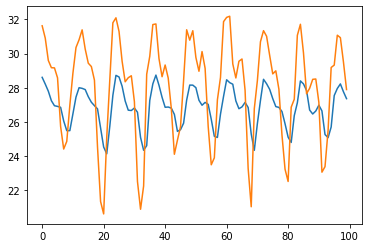

In [44]:
plt.plot(chad_test_results['Test Predictions'])
plt.plot(chad_test_results['Actuals'])

 # Haiti

In [45]:
haiti_final, haiti_final_temp_only = clean_df(haiti)
# haiti_final.head()
WINDOW_SIZE = 5
haiti_X, haiti_y = df_to_X_y(haiti_final_temp_only, WINDOW_SIZE)
haiti_X.shape, haiti_y.shape

((2226, 5, 1), (2226,))

In [46]:
haiti_train_len, haiti_val_len, haiti_test_len = get_lengths(haiti_final_temp_only)
print(haiti_train_len, haiti_val_len, haiti_test_len)
haiti_X_train, haiti_y_train = haiti_X[:haiti_train_len], haiti_y[:haiti_train_len]
haiti_X_val, haiti_y_val = haiti_X[haiti_train_len:(haiti_val_len+haiti_train_len)], haiti_y[haiti_train_len:(haiti_val_len+haiti_train_len)]
haiti_X_test, haiti_y_test = haiti_X[(haiti_val_len+haiti_train_len):], haiti_y[(haiti_val_len+haiti_train_len):]
haiti_X_train.shape, haiti_y_train.shape, haiti_X_val.shape, haiti_y_val.shape, haiti_X_test.shape, haiti_y_test.shape

2007 89 133


((2007, 5, 1), (2007,), (89, 5, 1), (89,), (130, 5, 1), (130,))

In [47]:
haiti_model = Sequential()
haiti_model.add(InputLayer((5,1)))
haiti_model.add(LSTM(64))
haiti_model.add(Dense(8, 'relu'))
haiti_model.add(Dense(1, 'linear'))
haiti_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 64)                16896     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [48]:
haiti_cp = ModelCheckpoint('haiti_model/', save_best_only=True)
haiti_history = History()
haiti_model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [49]:
haiti_model.fit(haiti_X_train, haiti_y_train, validation_data=(haiti_X_val, haiti_y_val), epochs=10, callbacks=[haiti_cp, haiti_history])

Epoch 1/10
54/63 [========================>.....] - ETA: 0s - loss: 591.6653 - root_mean_squared_error: 24.3242

63/63 [==============================] - 7s 86ms/step - loss: 572.2588 - root_mean_squared_error: 23.9219 - val_loss: 466.7232 - val_root_mean_squared_error: 21.6038
Epoch 2/10
63/63 [==============================] - ETA: 0s - loss: 289.1058 - root_mean_squared_error: 17.0031

63/63 [==============================] - 5s 84ms/step - loss: 289.1058 - root_mean_squared_error: 17.0031 - val_loss: 163.9838 - val_root_mean_squared_error: 12.8056
Epoch 3/10
55/63 [=========================>....] - ETA: 0s - loss: 64.9278 - root_mean_squared_error: 8.0578

63/63 [==============================] - 5s 76ms/step - loss: 58.5411 - root_mean_squared_error: 7.6512 - val_loss: 15.1502 - val_root_mean_squared_error: 3.8923
Epoch 4/10
63/63 [==============================] - ETA: 0s - loss: 3.2509 - root_mean_squared_error: 1.8030

63/63 [==============================] - 5s 76ms/step - loss: 3.2509 - root_mean_squared_error: 1.8030 - val_loss: 2.7261 - val_root_mean_squared_error: 1.6511
Epoch 5/10
55/63 [=========================>....] - ETA: 0s - loss: 1.8374 - root_mean_squared_error: 1.3555

63/63 [==============================] - 5s 76ms/step - loss: 1.8366 - root_mean_squared_error: 1.3552 - val_loss: 2.6593 - val_root_mean_squared_error: 1.6307
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 1.8363 - root_mean_squared_error: 1.3551 - val_loss: 2.7020 - val_root_mean_squared_error: 1.6438
Epoch 7/10
55/63 [=========================>....] - ETA: 0s - loss: 1.8331 - root_mean_squared_error: 1.3539

63/63 [==============================] - 5s 88ms/step - loss: 1.8345 - root_mean_squared_error: 1.3544 - val_loss: 2.6368 - val_root_mean_squared_error: 1.6238
Epoch 8/10
54/63 [========================>.....] - ETA: 0s - loss: 1.8465 - root_mean_squared_error: 1.3589

63/63 [==============================] - 5s 77ms/step - loss: 1.8359 - root_mean_squared_error: 1.3549 - val_loss: 2.5751 - val_root_mean_squared_error: 1.6047
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 1.8359 - root_mean_squared_error: 1.3549 - val_loss: 2.6311 - val_root_mean_squared_error: 1.6221
Epoch 10/10
53/63 [========================>.....] - ETA: 0s - loss: 1.8186 - root_mean_squared_error: 1.3486

63/63 [==============================] - 5s 75ms/step - loss: 1.8368 - root_mean_squared_error: 1.3553 - val_loss: 2.5732 - val_root_mean_squared_error: 1.6041


Text(0.5, 1.0, 'Val Loss')

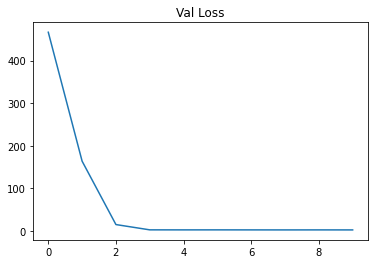

In [50]:
plt.plot(haiti_model.history.history['val_loss'])
plt.title('Val Loss')

In [51]:
haiti_model = load_model('haiti_model/')
haiti_train_predictions = haiti_model.predict(haiti_X_train).flatten()
haiti_train_results = pd.DataFrame(data={'Train Predictions': haiti_train_predictions, 'Actuals':haiti_y_train})
# afghan_train_results

63/63 [==============================] - 1s 2ms/step


In [52]:
haiti_test_predictions = haiti_model.predict(haiti_X_test).flatten()
haiti_test_results = pd.DataFrame(data={'Test Predictions':haiti_test_predictions, 'Actuals':haiti_y_test})
haiti_test_results["Difference"] = abs(haiti_test_results["Actuals"] - haiti_test_results["Test Predictions"])
# haiti_test_results
haiti_average_accuracy = haiti_test_results["Difference"].mean()
print("On Average, the mean difference between our predictions and actuals for our", len(haiti_test_results), "test data points is:", haiti_average_accuracy)

5/5 [==============================] - 0s 4ms/step
On Average, the mean difference between our predictions and actuals for our 130 test data points is: 1.3161359916100135


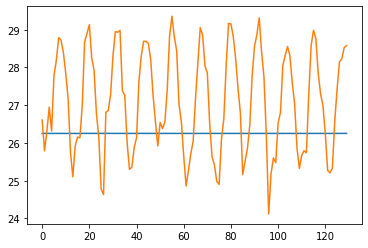

In [53]:
plt.plot(haiti_test_results['Test Predictions'])
plt.plot(haiti_test_results['Actuals'])

# Results

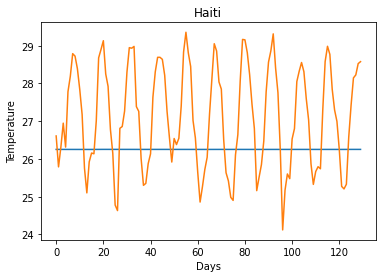

In [54]:
plt.plot(haiti_test_results['Test Predictions'])
plt.plot(haiti_test_results['Actuals'])
plt.title("Haiti");
plt.xlabel("Days");
plt.ylabel("Temperature");

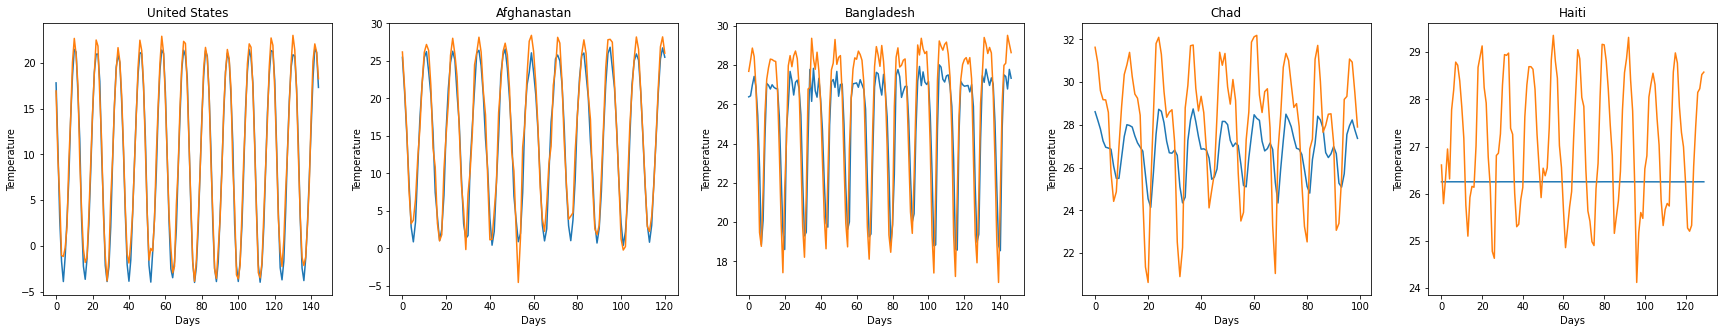

In [55]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(30, 5))
ax1.plot(test_results['Test Predictions']);
ax1.plot(test_results['Actuals']);
ax1.set_title("United States");
ax1.set_ylabel("Temperature");
ax1.set_xlabel("Days");
ax2.plot(afghan_test_results['Test Predictions']);
ax2.plot(afghan_test_results['Actuals']);
ax2.set_title("Afghanastan");
ax2.set_ylabel("Temperature");
ax2.set_xlabel("Days");
ax3.plot(bangladesh_test_results['Test Predictions']);
ax3.plot(bangladesh_test_results['Actuals']);
ax3.set_title("Bangladesh");
ax3.set_ylabel("Temperature");
ax3.set_xlabel("Days");
ax4.plot(chad_test_results['Test Predictions']);
ax4.plot(chad_test_results['Actuals']);
ax4.set_title("Chad");
ax4.set_ylabel("Temperature");
ax4.set_xlabel("Days");
ax5.plot(haiti_test_results['Test Predictions']);
ax5.plot(haiti_test_results['Actuals']);
ax5.set_title("Haiti");
ax5.set_ylabel("Temperature");
ax5.set_xlabel("Days");
